# **Project Objective**
This project is designed to simulate a real-world data science task. You will scrape property data from two real estate websites, clean and integrate the data, engineer features, and frame a predictive modeling challenge based on pricing.
The final deliverable will be a GitHub repository containing all project artifacts.
# **Assigned Websites**
You will be assigned two real estate websites. Each site contains listings for properties for rent and properties for sale:

•	Website 1: https://www.dubizzle.com.om/en/properties/

•	Website 2: https://hilalprp.com.om/

### **Your task is to collect data relevant to the pricing and characteristics of listed properties for sale**



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the CSV files
Hilal_df = pd.read_csv(r"C:\Users\bbuser\Desktop\Data_Science_Project\Data cleaning functions\hilal_cleaned.csv")
Dubizzle_df = pd.read_csv(r"C:\Users\bbuser\Desktop\Data_Science_Project\Data cleaning functions\dubizzle_cleaned.csv")

#Ensure same column names
#Concatenate the datasets (they have the same structure)
df = pd.concat([Hilal_df, Dubizzle_df], ignore_index=True)

#ave the merged file
df.to_csv("all_properties.csv", index=False)

In [3]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type
0,3-BEDROOM APARTMENT,Bausher,3,3,45000,334,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,3,4,290000,334,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,6,7,180000,334,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,300000,758,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,80000,334,For Sale
...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,38000,76,For Sale
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,2000,600,For Sale
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,2000,10,For Sale
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,31000,600,For Sale


# **Exploraty for data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    4343 non-null   object
 1   prop_location    4343 non-null   object
 2   number_of_rooms  4343 non-null   int64 
 3   prop_bathrooms   4343 non-null   int64 
 4   sale_price OMR   4343 non-null   int64 
 5   prop_area SqM    4343 non-null   int64 
 6   Ad_Type          4343 non-null   object
dtypes: int64(4), object(3)
memory usage: 237.6+ KB


In [5]:
df.columns

Index(['property_name', 'prop_location', 'number_of_rooms', 'prop_bathrooms',
       'sale_price OMR', 'prop_area SqM', 'Ad_Type'],
      dtype='object')

In [6]:
df.describe()

,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM
count,4343.000000,4343.000000,4343.000000,4343.000000
mean,3.058024,3.352061,102288.141837,326.924937
std,1.336462,1.530189,145445.904142,307.786311
min,1.000000,0.000000,180.000000,1.000000
25%,3.000000,3.000000,16000.000000,83.000000
50%,3.000000,3.000000,54000.000000,275.000000
75%,3.000000,3.000000,120000.000000,600.000000
max,12.000000,12.000000,999000.000000,7502.000000


In [7]:
df.shape

(4343, 7)

# **Check for duplicates**

In [8]:
df.duplicated().any()

np.True_

In [9]:
df.duplicated().sum()

np.int64(6)

In [10]:
duplicates = df[df.duplicated()]
print(duplicates)

                                      property_name  \
992                 WADI KABIR | WAREHOUSE FOR SALE   
1700                      للبيع ارضين شبك في العقدة   
1985                                 العامرات جحلوت   
2164  ارضين شبك المصنعه النهضه جنوب المرحله الثانيه   
2353              العامرات الحاجر الأولى سوبر كورنر   
2357                        العامرات الحشيه الثانيه   

                  prop_location  number_of_rooms  prop_bathrooms  \
992   Al Wadi Al Kabir, Muscat•                3               3   
1700    Al Buraimi, Al Buraimi•                3               3   
1985         Al Amarat, Muscat•                3               3   
2164     Al Masn'a, Al Batinah•                3               3   
2353         Al Amarat, Muscat•                3               3   
2357         Al Amarat, Muscat•                3               3   

      sale_price OMR  prop_area SqM   Ad_Type  
992           870000              3  For Sale  
1700            9000              1  For 

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

# **Feature Engineering**

### **Add columns**

In [13]:
#I'll add a column named (price_per_sqm)
df["price_per_sqm"] = df["sale_price OMR"] / df["prop_area SqM"]

In [14]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type,price_per_sqm
0,3-BEDROOM APARTMENT,Bausher,3,3,45000,334,For Sale,134.730539
1,3-BEDROOM VILLA,Al Mawaleh,3,4,290000,334,For Sale,868.263473
2,6-BEDROOM TWIN VILLA,Bausher,6,7,180000,334,For Sale,538.922156
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,300000,758,For Sale,395.778364
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,80000,334,For Sale,239.520958
...,...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,38000,76,For Sale,500.000000
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,2000,600,For Sale,3.333333
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,2000,10,For Sale,200.000000
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,31000,600,For Sale,51.666667


In [15]:
#I'll add a column foe rooms + washrooms in case the buyer want to take an idea of the capacity of the property
df["total_rooms"] = df["number_of_rooms"] + df["prop_bathrooms"]

In [16]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type,price_per_sqm,total_rooms
0,3-BEDROOM APARTMENT,Bausher,3,3,45000,334,For Sale,134.730539,6
1,3-BEDROOM VILLA,Al Mawaleh,3,4,290000,334,For Sale,868.263473,7
2,6-BEDROOM TWIN VILLA,Bausher,6,7,180000,334,For Sale,538.922156,13
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,300000,758,For Sale,395.778364,16
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,80000,334,For Sale,239.520958,10
...,...,...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,38000,76,For Sale,500.000000,4
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,2000,600,For Sale,3.333333,6
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,2000,10,For Sale,200.000000,6
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,31000,600,For Sale,51.666667,6


In [17]:
# Split 'prop_location' into City and Government
df[['City', 'Government']] = df['prop_location'].str.split(r'[,•-]', n=1, expand=True)

# Clean whitespace and bullet points
df['City'] = df['City'].str.strip()
df['Government'] = df['Government'].str.strip().str.rstrip('•')

#Fill missing Government with "Unknown"
df['Government'] = df['Government'].fillna("Unknown")

# Manually map known cities to their governments (if you have a list)
known_governments = {"Muscat": "Muscat", 
                     "Bausher": "Muscat",
                     "Al Mawaleh": "Muscat",
                     "Al Ansab": "Muscat",
                     "Al Hail": "Muscat",
                     "Al Khoudh": "Muscat",
                     "Maabelah": "Muscat",
                     "Qurum": "Muscat",
                     "Madinat Qaboos (MQ)": "Muscat",
                     "Mutrah": "Muscat",
                     "Muscat Hills": "Muscat",
                     "Al Khuwair": "Muscat",
                     "Rusayl": "Muscat",
                     "Al Ghoubrah": "Muscat",
                     "MUSCAT BAY": "Muscat",
                     "Salalah": "Dhofar",
                     "Nizwa": "Al Dakhiliyah",
                     "Barka":"AlBatinah"}
df['Government'] = df.apply(lambda row: known_governments.get(row['City'], row['Government']),axis=1)

In [18]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type,price_per_sqm,total_rooms,City,Government
0,3-BEDROOM APARTMENT,Bausher,3,3,45000,334,For Sale,134.730539,6,Bausher,Muscat
1,3-BEDROOM VILLA,Al Mawaleh,3,4,290000,334,For Sale,868.263473,7,Al Mawaleh,Muscat
2,6-BEDROOM TWIN VILLA,Bausher,6,7,180000,334,For Sale,538.922156,13,Bausher,Muscat
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,300000,758,For Sale,395.778364,16,Al Ansab,Muscat
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,80000,334,For Sale,239.520958,10,Al Hail,Muscat
...,...,...,...,...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,38000,76,For Sale,500.000000,4,Al Khoud,Muscat
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,2000,600,For Sale,3.333333,6,Ibri,Al Dhahirah
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,2000,10,For Sale,200.000000,6,Al Rusayl,Muscat
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,31000,600,For Sale,51.666667,6,Barka,AlBatinah


### **Encode Categorical Values**

In [19]:
#Convert text values (e.g., prop_location, Ad_Type) to numerical for modeling.
#Label Encoding (for ordinal or simple categoricals)

le = LabelEncoder()

df["location_encoded"] = le.fit_transform(df["prop_location"])
df["ad_type_encoded"] = le.fit_transform(df["Ad_Type"])
df["city_encoded"] = le.fit_transform(df["City"])
df["government_encoded"] = le.fit_transform(df["Government"])

In [20]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type,price_per_sqm,total_rooms,City,Government,location_encoded,ad_type_encoded,city_encoded,government_encoded
0,3-BEDROOM APARTMENT,Bausher,3,3,45000,334,For Sale,134.730539,6,Bausher,Muscat,37,0,33,10
1,3-BEDROOM VILLA,Al Mawaleh,3,4,290000,334,For Sale,868.263473,7,Al Mawaleh,Muscat,20,0,18,10
2,6-BEDROOM TWIN VILLA,Bausher,6,7,180000,334,For Sale,538.922156,13,Bausher,Muscat,37,0,33,10
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,300000,758,For Sale,395.778364,16,Al Ansab,Muscat,3,0,3,10
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,80000,334,For Sale,239.520958,10,Al Hail,Muscat,9,0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,38000,76,For Sale,500.000000,4,Al Khoud,Muscat,14,0,13,10
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,2000,600,For Sale,3.333333,6,Ibri,Al Dhahirah,49,0,45,4
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,2000,10,For Sale,200.000000,6,Al Rusayl,Muscat,25,0,22,10
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,31000,600,For Sale,51.666667,6,Barka,AlBatinah,35,0,31,7


In [21]:
df.to_csv("encoded.csv", index=False)

### **Feature Scaling**

##### **a. StandardScaler (mean = 0, std = 1)**

**We use StandardScaler to transform numerical features so they all have a mean of 0 and standard deviation of 1. This makes features like price and area comparable in scale, which helps many machine learning models train faster and perform better, especially models sensitive to feature scale.**

In [22]:
scaler = StandardScaler()
df[["sale_price OMR", "prop_area SqM", "price_per_sqm"]] = scaler.fit_transform(df[["sale_price OMR", "prop_area SqM", "price_per_sqm"]])

##### **b. MinMaxScaler (range 0 to 1)**

**MinMaxScaler scales numerical features to a fixed range, usually 0 to 1, by transforming values based on the minimum and maximum of each feature. This keeps all values within [0, 1], preserving their relative relationships and making features comparable. It’s useful when you want all inputs normalized without changing their distribution shape.**

In [23]:
scaler = MinMaxScaler()
df[["sale_price OMR", "prop_area SqM", "price_per_sqm"]] = scaler.fit_transform(df[["sale_price OMR", "prop_area SqM", "price_per_sqm"]])

In [24]:
df

,property_name,prop_location,number_of_rooms,prop_bathrooms,sale_price OMR,prop_area SqM,Ad_Type,price_per_sqm,total_rooms,City,Government,location_encoded,ad_type_encoded,city_encoded,government_encoded
0,3-BEDROOM APARTMENT,Bausher,3,3,0.044873,0.044394,For Sale,0.000134,6,Bausher,Muscat,37,0,33,10
1,3-BEDROOM VILLA,Al Mawaleh,3,4,0.290162,0.044394,For Sale,0.000869,7,Al Mawaleh,Muscat,20,0,18,10
2,6-BEDROOM TWIN VILLA,Bausher,6,7,0.180032,0.044394,For Sale,0.000539,13,Bausher,Muscat,37,0,33,10
3,7-BEDROOM DETACHED VILLA,Al Ansab,7,9,0.300174,0.100920,For Sale,0.000396,16,Al Ansab,Muscat,3,0,3,10
4,4-BEDROOM DETACHED VILLA,Al Hail,4,6,0.079914,0.044394,For Sale,0.000239,10,Al Hail,Muscat,9,0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,شقة مفروشة مميزة للبيع في الخوض السابعة,"Al Khoud, Muscat•",2,2,0.037865,0.009999,For Sale,0.000500,4,Al Khoud,Muscat,14,0,13,10
4339,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3,3,0.001822,0.079856,For Sale,0.000003,6,Ibri,Al Dhahirah,49,0,45,4
4340,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3,3,0.001822,0.001200,For Sale,0.000200,6,Al Rusayl,Muscat,25,0,22,10
4341,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3,3,0.030856,0.079856,For Sale,0.000051,6,Barka,AlBatinah,35,0,31,7


In [25]:
df.to_csv("city.csv", index=False)

# **Outliers**

In [26]:
Q1 = df['sale_price OMR'].quantile(0.25)
Q3 = df['sale_price OMR'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['sale_price OMR'] >= lower_bound) & (df['sale_price OMR'] <= upper_bound)]


In [27]:
df['z_score'] = zscore(df['sale_price OMR'])
df_no_outliers = df[(df['z_score'].abs() < 3)]

# **Predictive Modeling (OPTIONAL)**

# **It's just a try**

### **1. Define Objective**

**Predict property sale price (sale_price) based on features like area, number of rooms, bathrooms, location, etc.**

### **2. Prepare Dataset**

In [28]:
# Features (X) and target (y)
# Define feature columns
X = df[[ 'number_of_rooms',
    'prop_bathrooms',
    'prop_area SqM',
    'ad_type_encoded',
    'location_encoded',
    'city_encoded',
    'government_encoded',
    'total_rooms',
    'price_per_sqm',]]

# Target variable
y = df["sale_price OMR"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3. Handle Categorical Variables & Scaling**

In [29]:
# Define desired numeric columns
desired_num_cols = ["prop_area SqM", "prop_bathrooms", "number_of_rooms", "price_per_sqm"]

# Filter to only the ones that actually exist
num_cols = [col for col in desired_num_cols if col in X_train.columns]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to existing numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# **Model Suggestions & Brief Implementation**

### **a) Linear Regression**

In [30]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.01
R-squared (R2): 0.43


### **b) Decision Tree Regressor**

In [31]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)

# Print metrics
print("Decision Tree RMSE:", rmse)
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree RMSE: 0.01970229794678782
Decision Tree R2: 0.9795801300066548


### **c) Random Forest Regressor**

In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest RMSE:", rmse)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.010338163355768377
Random Forest R2: 0.9943778039130429


**Note:
Among the three tested models, the Random Forest Regressor showed the best performance, achieving the lowest Root Mean Squared Error (RMSE = 0.0103) and the highest R-squared value (R² = 0.99). This means it explains most of the variation in the target variable and provides highly accurate predictions. The Decision Tree model also performed well but may be prone to overfitting. On the other hand, the Linear Regression model had the weakest performance, making it less suitable for this dataset.
Based on the results, the Random Forest model is chosen as the most effective predictive model for this task.**

# **Plotting**

Text(0.5, 1.0, 'Sale Price - Outliers Detection')

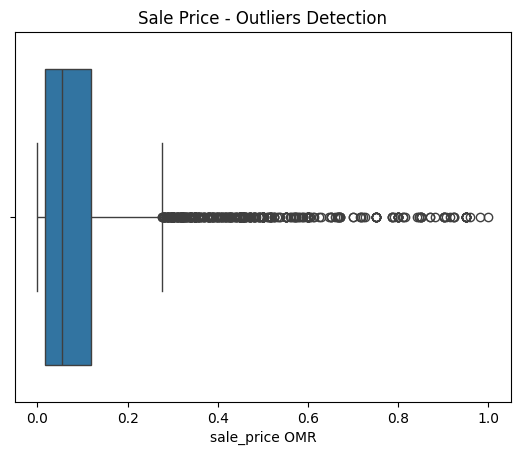

In [33]:
sns.boxplot(x=df["sale_price OMR"])
plt.title("Sale Price - Outliers Detection")

Text(0.5, 1.0, 'Sale Price Distribution')

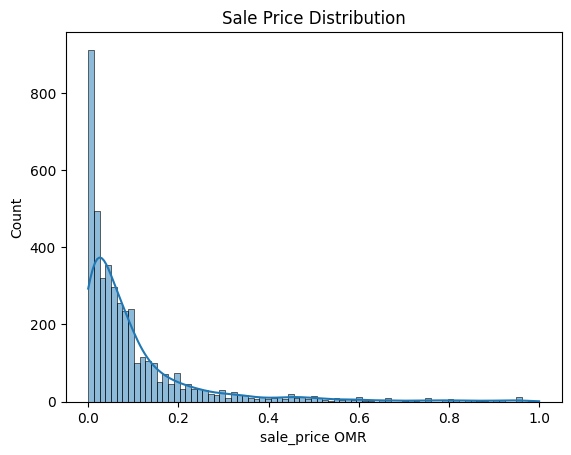

In [34]:
sns.histplot(df["sale_price OMR"], kde=True)
plt.title("Sale Price Distribution")

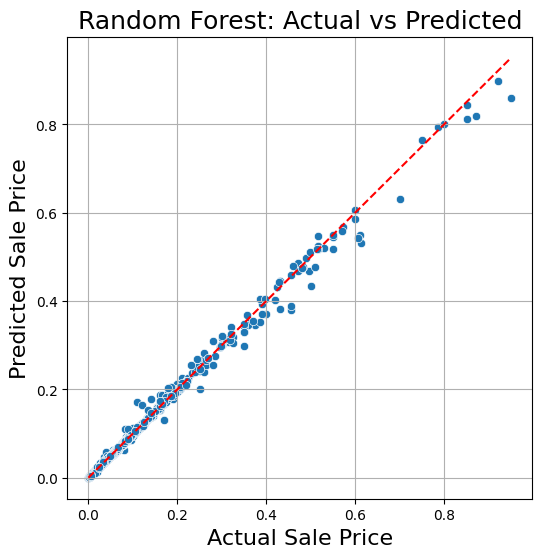

In [35]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price", fontsize=16)
plt.ylabel("Predicted Sale Price", fontsize=16)
plt.title("Random Forest: Actual vs Predicted", fontsize=18)
plt.grid(True)
plt.show()